Most introductions to hypothesis testing are targeted at non-mathematicians.
This short post aims to be a precise introduction to the subject for mathematicians.

*Remark*. While the presentation may differ, some of the notation in this article is from [L. Wasserman's *All of Statistics: a Concise Course in Statistical Inference*](https://doi.org/10.1007/978-0-387-21736-9).

Consider a parametric model with parameter set $\Theta$.
The model generates realizations $X_1, \ldots, X_n$.

**Example (Coin Flip).**
*We are given a coin.
The coin has probability $\theta$ in $\Theta \equiv [0, 1]$ of showing heads.
We flip the coin $n$ times and record $X_i = 1$ if the $i$-th flip is heads and $0$ otherwise.*

Throughout this article, we use the above coin flip model to illustrate the ideas.

In hypothesis testing, we start with a *hypothesis* (also called the *null hypothesis*).
Specifying a null hypothesis is equivalent to picking some nonempty subset $\Theta_0$ of the parameter set $\Theta$.
Precisely, the null hypothesis is the assumption that realizations are being generated by the model  parameterized by some $\theta$ in $\Theta_0$.

**Example (Coin Flip).**
*Our hypothesis is $\Theta_0 \equiv \{ 1 / 2 \}$.
That is, we hypothesize that the coin is fair.*

For brevity, let $X \equiv (X_1, \ldots, X_n)$.
To specify when the null hypothesis is rejected, we define a *rejection function* $R$ such that $R(X)$ is an indicator random variable whose unit value corresponds to rejection.

**Example (Coin Flip).**
*Let
\begin{equation}
    R(x_1, \ldots, x_n)
    = \left[
        \left| \frac{x_1 + \cdots + x_n}{n} - \frac{1}{2} \right| \geq \epsilon
    \right]
\end{equation}
where $[\cdot]$ is the [Iverson bracket](https://en.wikipedia.org/wiki/Iverson_bracket).
This corresponds to rejecting the null hypothesis whenever we see "significantly" more heads than tails (or vice versa). Our notion of significance is controlled by $\epsilon$.*

Note that nothing stops us from making a bad test.
For example, taking $\epsilon = 0$ in the above example yields a test that always rejects.
Conversely, taking $\epsilon > 1/2$ yields a test that never rejects.

**Definition (Power).**
*The power
\begin{equation}
    \operatorname{Power}(\theta, R)
    \equiv \mathbb{P}_\theta \{ R(X) = 1 \}
\end{equation}
gives the probability of rejection assuming that the true model parameter is $\theta$.*

**Example (Coin Flip).**
*Let $F_\theta$ denote the CDF of a binomial distribution with $n$ trials and success probability $\theta$.
Let $S \equiv X_1 + \cdots + X_n$.
Then, assuming $\epsilon$ is positive,
\begin{equation}
\operatorname{Power}(\theta,R)
    = 1 - \mathbb{P}_{\theta}\{\left|S/n-1/2\right| < \epsilon\}
    = 1 - \mathbb{P}_{\theta}\{n/2-\epsilon n < S < n/2+\epsilon n\}
    = 1 - F_\theta(\left(n/2+\epsilon n\right)-) + F_\theta(n/2-\epsilon n)
\end{equation}
where $F(x-) = \lim_{y \uparrow x} F(y)$ is a [left-hand limit](https://en.wikipedia.org/wiki/One-sided_limit).*

In [10]:
%load_ext lab_black

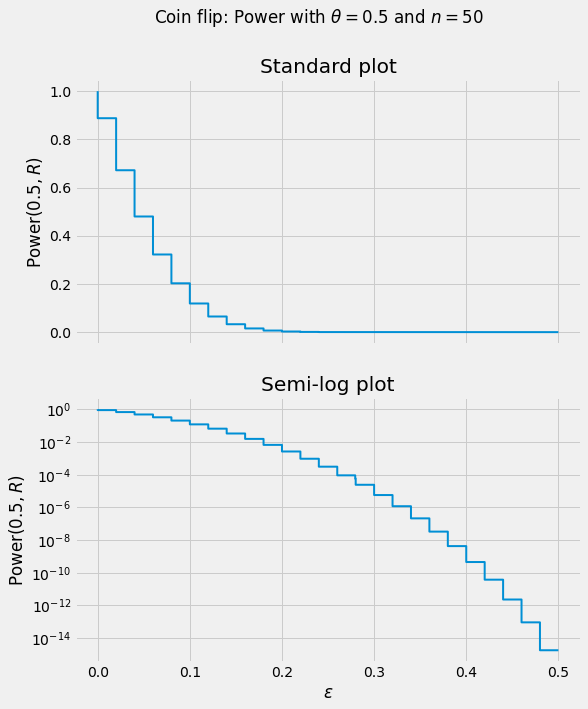

In [119]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


mpl.style.use("fivethirtyeight")
mpl.rcParams["lines.linewidth"] = 2

n = 50
p = 0.5
epsilon = np.linspace(0.0, 0.5, 1001)
a = 0.5 * n - epsilon * n
b = 0.5 * n + epsilon * n - 1e-6
power = 1.0 - (binom.cdf(b, n, p) - binom.cdf(a, n, p))
power[0] = 1.0

fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(1.618 * 5.0, 2.0 * 5.0), sharex=True
)
ax1.step(epsilon, power)
ax2.step(epsilon, power)
ax2.set_yscale("log")
ax2.set_xlabel("$\epsilon$")
ax1.set_ylabel(f"$\operatorname{{Power}}({p}, R)$")
ax2.set_ylabel(f"$\operatorname{{Power}}({p}, R)$")
ax1.set_title("Standard plot")
ax2.set_title("Semi-log plot")
_ = fig.suptitle(f"Coin flip: Power with $\\theta = {p}$ and $n = {n}$")

**Definition (Size).**
*The size of a test
\begin{equation}
    \operatorname{Size}(R) \equiv \sup_{\theta \in \Theta_0} \operatorname{Power}(\theta, R)
\end{equation}
gives, assuming that the null hypothesis is true, the "worst-case" probability of rejection.*

Rejecting the null hypothesis errenously is called a *type I error* (see the table below).
The size puts an upper bound on making a type I error.

|                          | Retain Null   | Reject Null  |
| ------------------------ | ------------- | ------------ |
| Null Hypothesis is True  | No error      | Type I error |
| Null Hypothesis is False | Type II error | No error     |

**Example (Coin Flip).**
*Since $\Theta_0 = \{ 1 / 2 \}$ is a singleton, $\operatorname{Size}(R) = \operatorname{Power}(1/2, R)$.*

**Definition (p-value).**
*Let $(R_\alpha)_\alpha$ be a collection of rejection functions.
Define
\begin{equation}
    \operatorname{p-value}
    \equiv \inf \left\{ \operatorname{Size}(R_\alpha) \colon R_\alpha(X) = 1 \right\}.
\end{equation}
as the smallest size for which the null-hypothesis is rejected.*

Unlike the size, the p-value is itself a random variable.
The smaller the p-value, the more confident we can be that a rejection is justified.
A common threshold for rejection is a p-value smaller than 0.01.
A rejection in this case can be understood as being at least 99% certain the rejection was not done erroneously.

**Theorem 1.**
*Suppose we have a collection of rejection functions $(R_{\alpha})_{\alpha}$ of the form
\begin{equation}
    R_{\alpha}(x_1, \ldots, x_n)
    = [f(x_1, \ldots, x_n) \geq c_{\alpha}]
\end{equation}
where $f$ does not vary with $\alpha$.
Suppose also that for each point $y$ in the range of $f$, there exists $\alpha$ such that $c_{\alpha} = y$.
Then,
\begin{equation}
    \operatorname{p-value}(\omega)
    \equiv
    \sup_{\theta \in \Theta_0} \mathbb{P}_{\theta} \{
        f(X) \geq f(X(\omega))
    \}.
\end{equation}
In other words, the p-value (under the setting of Theorem 1) is the worst-case probability of sampling $f(X)$ larger than what was observed, $f(X(\omega))$.
Note that in the above, we have used $\omega$ to distinguish between the actual random variable $X$ and $X(\omega)$, the observation.*

*Proof*.
Recall that the p-value is an infimum among sizes of tests that reject the observed data.
The infimum is achieved at $c_\alpha = f(X(\omega))$.
This is because a larger value of $c_\alpha$ yields a test that accepts while a smaller value yields a test that rejects at least as many outcomes, thereby potentially having larger size.
The size under the choice of $c_\alpha = f(X(\omega))$ is exactly the expression for the p-value given above. $\square$

**Example (Coin Flip).**
*We flip the coin $n$ times and observe $S(\omega)$ heads.
By Theorem 1,
\begin{equation}
    \operatorname{p-value}(\omega)
    = \mathbb{P}_{1/2} \left\{
    \left|S/n - 1/2\right| \geq
    \left|S(\omega)/n - 1/2\right|
    \right\}.
\end{equation}
Denoting by $K(\omega) = |S(\omega) - n/2|$,
\begin{equation}
\operatorname{p-value}(\omega)
= 1 - \mathbb{P}_{1/2} \left\{
n/2 - K(\omega) < S < n/2 + K(\omega)
\right\}
= 1 - F_{1/2}(\left(n/2 + K(\omega)\right)-) + F_{1/2}(n/2 - K(\omega)).
\end{equation}*

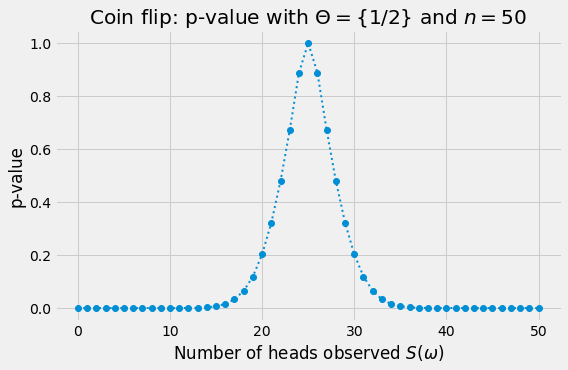

In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


mpl.style.use("fivethirtyeight")
mpl.rcParams["lines.linewidth"] = 2

n = 50
p = 0.5
S = np.arange(n + 1)
K = S - 0.5 * n
a = 0.5 * n - np.abs(K)
b = 0.5 * n + np.abs(K) - 1e-6
p_value = 1.0 - (binom.cdf(b, n, p) - binom.cdf(a, n, p))
p_value[n // 2] = 1.0
plt.figure(figsize=(1.618 * 5.0, 5.0))
plt.plot(S, p_value, ":o")
plt.xlabel("Number of heads observed $S(\omega)$")
plt.ylabel("p-value")
_ = plt.title("Coin flip: p-value with $\\Theta = \{1/2\}$ and $n = 50$")

**Theorem 2.**
*Suppose the setting of Theorem 1 and that, in addition, $\Theta_0 = \{\theta_0\}$ is a singleton and $f(X)$ has a continuous and strictly increasing CDF under $\theta_0$. Then, the p-value has a uniform distribution on $[0,1]$ under $\theta_0$.*

In other words, if the null hypothesis is true, the p-value (under the setting of Theorem 2) is uniformly distributed on $[0, 1]$.

*Proof*.
Denote by $G$ the CDF of $f(X)$ under $\theta_0$.
By Theorem 1,
\begin{equation}
    \operatorname{p-value}(\omega) = 1 - G[f(X(\omega))].
\end{equation}
Then (omitting the subscript $\theta_0$ for brevity),
\begin{equation}
    \mathbb{P} \{
        \omega \colon \operatorname{p-value}(\omega) \leq u
    \}
    = 1 - \mathbb{P} \{
        \omega \colon G[f(X(\omega))] \leq
        1 - u
    \}
    = 1 - \mathbb{P} \{
        \omega \colon f(X(\omega)) \leq
        G^{-1}(1 - u)
    \}
    = 1 - G(G^{-1}(1 - u)) = u. \square
\end{equation}